In [1]:
import tensorflow as tf
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers

In [2]:
# Importar base de datos
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [7]:
# Diccionario de palabras
word_index = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [9]:
word_index = dict([(value, key) for (key, value) in word_index.items()])

In [11]:
for _ in train_data[0]:
    print(word_index.get(_ -3))

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

In [14]:
# vectorizar
def vectorizar(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1
    return results

In [15]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [16]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [17]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [18]:
y_train[0]

1.0

Construcción del modelo

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

In [25]:
# Conjuntos para validación 
x_val = x_train[:10000] # Validation
partial_x_train = x_train[10000:] # Test

y_val = y_train[:10000] # Validation
partial_y_train = y_train[10000:] # Test

In [26]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4


30/30 [==============================] - 1s 26ms/step - loss: 0.5247 - accuracy: 0.7705 - val_loss: 0.3919 - val_accuracy: 0.8633
Epoch 2/4
30/30 [==============================] - 0s 6ms/step - loss: 0.3138 - accuracy: 0.8979 - val_loss: 0.3074 - val_accuracy: 0.8853
Epoch 3/4
30/30 [==============================] - 0s 6ms/step - loss: 0.2355 - accuracy: 0.9191 - val_loss: 0.2826 - val_accuracy: 0.8869
Epoch 4/4
30/30 [==============================] - 0s 6ms/step - loss: 0.1838 - accuracy: 0.9423 - val_loss: 0.2778 - val_accuracy: 0.8867


In [27]:
import matplotlib.pyplot as plt

history_dict = history.history

In [28]:
history_dict # Guarda la historia del entrenamiento 

{'loss': [0.5246506929397583,
  0.3137669861316681,
  0.23545582592487335,
  0.1837690770626068],
 'accuracy': [0.770466685295105,
  0.897933304309845,
  0.9191333055496216,
  0.9423333406448364],
 'val_loss': [0.39194852113723755,
  0.30743739008903503,
  0.2825661301612854,
  0.2778388559818268],
 'val_accuracy': [0.8633000254631042,
  0.8852999806404114,
  0.886900007724762,
  0.8866999745368958]}

In [30]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1,len(loss_values)+1)

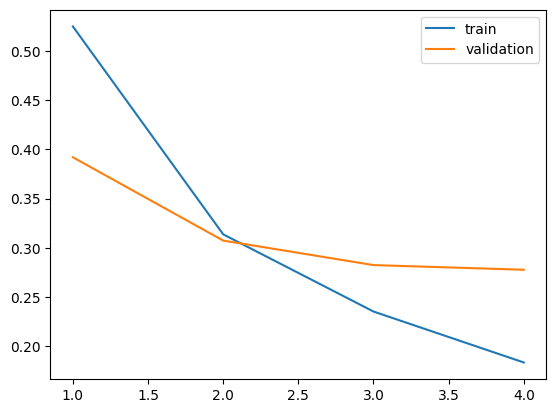

In [36]:
plt.plot(epoch,loss_values, label='train')
plt.plot(epoch,val_loss_values, label='validation')
plt.legend()
plt.show()

Como la red en el set de `train` tuvo una aprendizaje mayor al de `validation` se concluye que el modelo tiene <strong>*overfitting*</strong>

In [33]:
# Evaluacion del modelo
model.evaluate(x_test, y_test)   

782/782 [==============================] - 1s 999us/step - loss: 0.2919 - accuracy: 0.8826


[0.2919226884841919, 0.8825600147247314]

# Eliminando <strong>*overfitting*</strong>

In [37]:
model_2 = models.Sequential()
model_2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

In [38]:
model_2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

In [39]:
history_2 = model_2.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5258 - accuracy: 0.7817 - val_loss: 0.4467 - val_accuracy: 0.8071
Epoch 2/20
30/30 [==============================] - 0s 6ms/step - loss: 0.3357 - accuracy: 0.8879 - val_loss: 0.3197 - val_accuracy: 0.8843
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2525 - accuracy: 0.9150 - val_loss: 0.2891 - val_accuracy: 0.8858
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2056 - accuracy: 0.9319 - val_loss: 0.2756 - val_accuracy: 0.8903
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1687 - accuracy: 0.9442 - val_loss: 0.3040 - val_accuracy: 0.8778
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1471 - accuracy: 0.9512 - val_loss: 0.2794 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1237 - accuracy: 0.9617 - val_loss: 0.2895 - val_accuracy: 0.8858
Epoch 8/20
30/30 [=

In [40]:
# Modelo menos complejo

model_3 = models.Sequential()
model_3.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model_3.add(layers.Dense(4, activation='relu'))
model_3.add(layers.Dense(1, activation='sigmoid'))

model_3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

history_3 = model_3.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 17ms/step - loss: 0.6299 - accuracy: 0.6498 - val_loss: 0.5746 - val_accuracy: 0.7690
Epoch 2/20
30/30 [==============================] - 0s 5ms/step - loss: 0.5390 - accuracy: 0.7867 - val_loss: 0.5249 - val_accuracy: 0.8138
Epoch 3/20
30/30 [==============================] - 0s 5ms/step - loss: 0.4902 - accuracy: 0.8503 - val_loss: 0.5026 - val_accuracy: 0.8079
Epoch 4/20
30/30 [==============================] - 0s 5ms/step - loss: 0.4556 - accuracy: 0.8814 - val_loss: 0.4782 - val_accuracy: 0.8616
Epoch 5/20
30/30 [==============================] - 0s 5ms/step - loss: 0.4290 - accuracy: 0.9031 - val_loss: 0.4683 - val_accuracy: 0.8578
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.4062 - accuracy: 0.9199 - val_loss: 0.4726 - val_accuracy: 0.8423
Epoch 7/20
30/30 [==============================] - 0s 5ms/step - loss: 0.3868 - accuracy: 0.9307 - val_loss: 0.4520 - val_accuracy: 0.8737
Epoch 8/20
30/30 [=

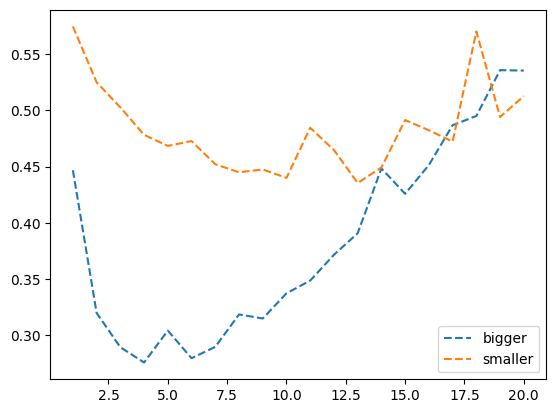

In [43]:
val_loss_values_m2 = history_2.history['val_loss']
val_loss_values_m3 = history_3.history['val_loss']

epoch = range(1,len(history_2.history['val_loss'])+1)

plt.plot(epoch,val_loss_values_m2, '--',label='bigger')
plt.plot(epoch,val_loss_values_m3, '--',label='smaller')
plt.legend()
plt.show()

Regularización

In [44]:
from keras import regularizers

In [46]:
model_4 = models.Sequential()
model_4.add(layers.Dense(4, activation='relu', input_shape=(10000,),
                         kernel_regularizer=regularizers.l2(0.001)))
model_4.add(layers.Dense(4, activation='relu',
                         kernel_regularizer=regularizers.l2(0.001)))
model_4.add(layers.Dense(1, activation='sigmoid'))

model_4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

history_4 = model_4.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6845 - accuracy: 0.5069 - val_loss: 0.6515 - val_accuracy: 0.5319
Epoch 2/20
30/30 [==============================] - 0s 6ms/step - loss: 0.6286 - accuracy: 0.5827 - val_loss: 0.6095 - val_accuracy: 0.6706
Epoch 3/20
30/30 [==============================] - 0s 5ms/step - loss: 0.5847 - accuracy: 0.7283 - val_loss: 0.5775 - val_accuracy: 0.8231
Epoch 4/20
30/30 [==============================] - 0s 5ms/step - loss: 0.5468 - accuracy: 0.8278 - val_loss: 0.5449 - val_accuracy: 0.8025
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.5090 - accuracy: 0.8655 - val_loss: 0.5119 - val_accuracy: 0.8319
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.4689 - accuracy: 0.8870 - val_loss: 0.4771 - val_accuracy: 0.8526
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.4253 - accuracy: 0.9056 - val_loss: 0.4403 - val_accuracy: 0.8643
Epoch 8/20
30/30 [=

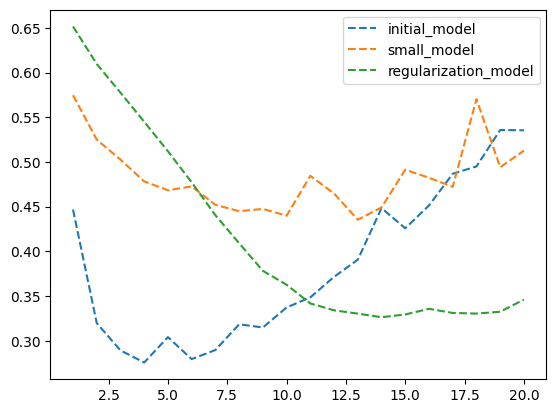

In [47]:
val_loss_values_m2 = history_2.history['val_loss']
val_loss_values_m3 = history_3.history['val_loss']
val_loss_values_m4 = history_4.history['val_loss']

epoch = range(1,len(history_2.history['val_loss'])+1)

plt.plot(epoch,val_loss_values_m2, '--',label='initial_model')
plt.plot(epoch,val_loss_values_m3, '--',label='small_model')
plt.plot(epoch,val_loss_values_m4, '--',label='regularization_model')
plt.legend()
plt.show()

DropOut

In [48]:
model_5 = models.Sequential()
model_5.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model_5.add(layers.Dropout(0.5))
model_5.add(layers.Dense(4, activation='relu'))
model_5.add(layers.Dropout(0.5))
model_5.add(layers.Dense(1, activation='sigmoid'))

model_5.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

history_5 = model_5.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6661 - accuracy: 0.6041 - val_loss: 0.6533 - val_accuracy: 0.8125
Epoch 2/20
30/30 [==============================] - 0s 6ms/step - loss: 0.6229 - accuracy: 0.6659 - val_loss: 0.6059 - val_accuracy: 0.8035
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 0.5885 - accuracy: 0.6954 - val_loss: 0.5613 - val_accuracy: 0.8468
Epoch 4/20
30/30 [==============================] - 0s 5ms/step - loss: 0.5563 - accuracy: 0.7208 - val_loss: 0.5302 - val_accuracy: 0.8724
Epoch 5/20
30/30 [==============================] - 0s 5ms/step - loss: 0.5342 - accuracy: 0.7337 - val_loss: 0.4943 - val_accuracy: 0.8774
Epoch 6/20
30/30 [==============================] - 0s 5ms/step - loss: 0.5135 - accuracy: 0.7442 - val_loss: 0.4610 - val_accuracy: 0.8806
Epoch 7/20
30/30 [==============================] - 0s 5ms/step - loss: 0.4996 - accuracy: 0.7505 - val_loss: 0.4261 - val_accuracy: 0.8841
Epoch 8/20
30/30 [=

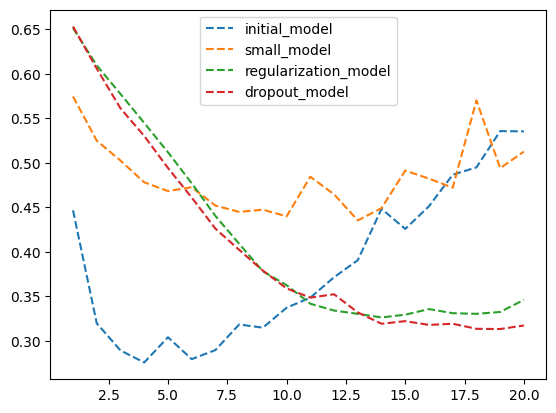

In [49]:
val_loss_values_m2 = history_2.history['val_loss']
val_loss_values_m3 = history_3.history['val_loss']
val_loss_values_m4 = history_4.history['val_loss']
val_loss_values_m5 = history_5.history['val_loss']

epoch = range(1,len(history_2.history['val_loss'])+1)

plt.plot(epoch,val_loss_values_m2, '--',label='initial_model')
plt.plot(epoch,val_loss_values_m3, '--',label='small_model')
plt.plot(epoch,val_loss_values_m4, '--',label='regularization_model')
plt.plot(epoch,val_loss_values_m5, '--',label='dropout_model')
plt.legend()
plt.show()